### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\Food_Fresh_Spoiled.xlsx


### Data Loading

In [2]:
df=pd.read_excel("input/Food_Fresh_Spoiled.xlsx")
df=df.sample(frac=1).reset_index(drop=True)

$$ Preliminary $$ $$ Analysis $$

In [3]:
df.head()

,CO,NH3,C6H6,Status
0,1129,455,92,1
1,179,40,59,0
2,156,25,66,0
3,157,36,61,0
4,936,525,96,1


In [4]:
df.shape

(1198, 4)

### Data Preprocessing

In [5]:
df.isnull().sum()

CO        0
NH3       0
C6H6      0
Status    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CO      1198 non-null   int64
 1   NH3     1198 non-null   int64
 2   C6H6    1198 non-null   int64
 3   Status  1198 non-null   int64
dtypes: int64(4)
memory usage: 37.6 KB


In [7]:
df["Status"].unique()

array([1, 0], dtype=int64)

In [8]:
df["Status"].value_counts()

1    599
0    599
Name: Status, dtype: int64

$$AnalysingStatusFeature$$

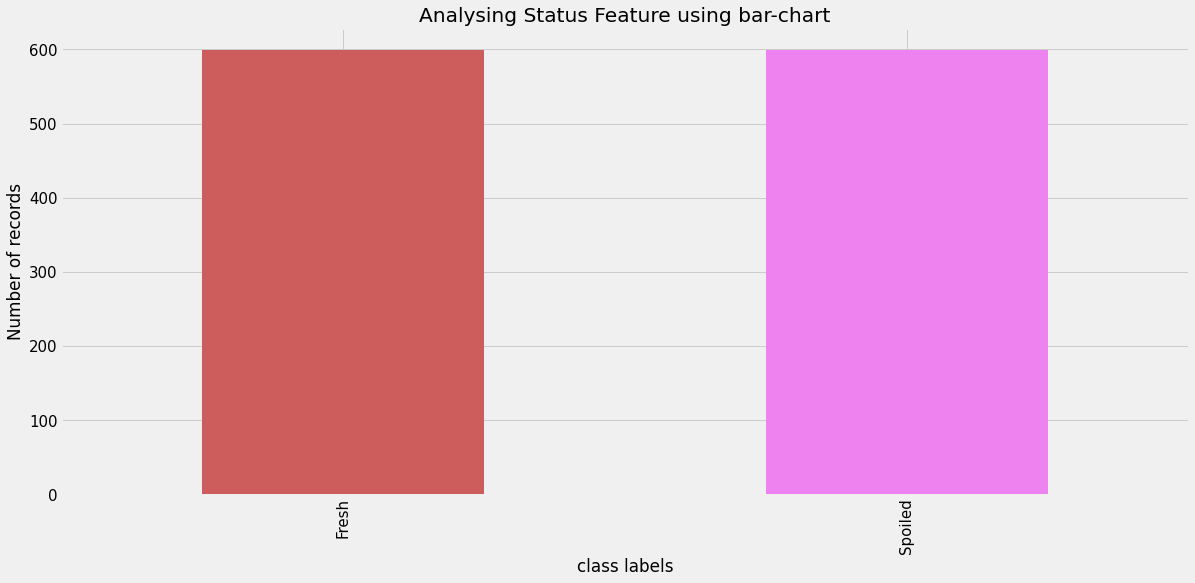

In [9]:
with plt.style.context(style="fivethirtyeight"):
    ax=df["Status"].value_counts(ascending=True).plot.bar(figsize=(18,8),
                                                          fontsize=15,
                                                          title="Analysing Status Feature using bar-chart",
                                                          xlabel="class labels",
                                                          ylabel="Number of records",
                                                          color=["indianred","violet"])
    plt.xticks([0,1],["Fresh","Spoiled"])
    plt.show()

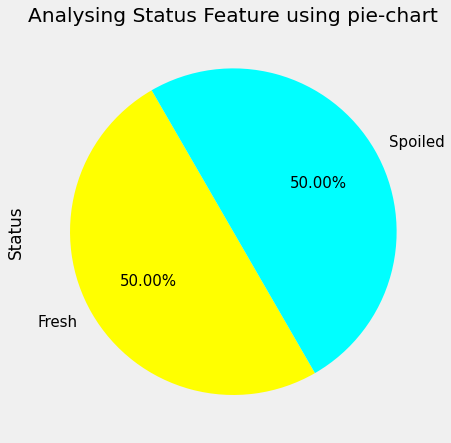

In [10]:
with plt.style.context(style="fivethirtyeight"):
    ax=df["Status"].value_counts(ascending=True).plot.pie(figsize=(7,7),
                                                          fontsize=15,
                                                          title="Analysing Status Feature using pie-chart",
                                                          autopct="%.2f%%",
                                                          startangle=120,
                                                          colors=["yellow","aqua"],
                                                         labels=["Fresh","Spoiled"])

$$AnalysingCOfeature$$

In [11]:
min_co=df["CO"].min()
max_co=df["CO"].max()
print(f"Minimum Number in CO features is -> {min_co} ")
print(f"Maximum Number in CO feature is -> {max_co}")

Minimum Number in CO features is -> 95 
Maximum Number in CO feature is -> 1750


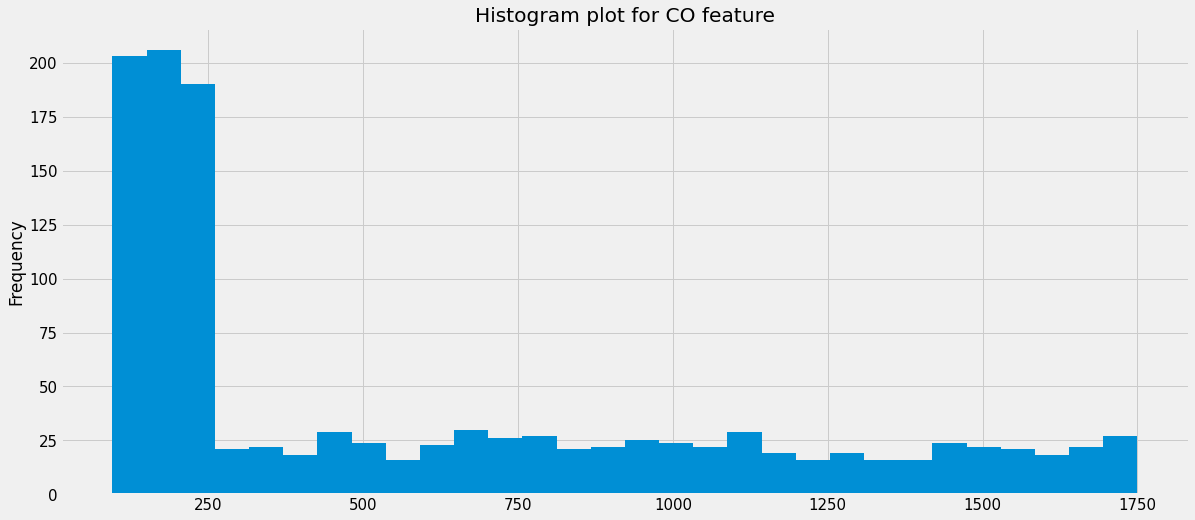

In [12]:
with plt.style.context(style="fivethirtyeight"):
    ax=df["CO"].plot.hist(bins=30,figsize=(18,8),fontsize=15,title="Histogram plot for CO feature")

$$AnalysingNH3feature$$

In [13]:
min_nh3=df["NH3"].min()
max_nh3=df["NH3"].max()
print(f"Minimum Number in NH3 features is -> {min_nh3}")
print(f"Maximum Number in NH3 feature is -> {max_nh3}")

Minimum Number in NH3 features is -> 24
Maximum Number in NH3 feature is -> 550


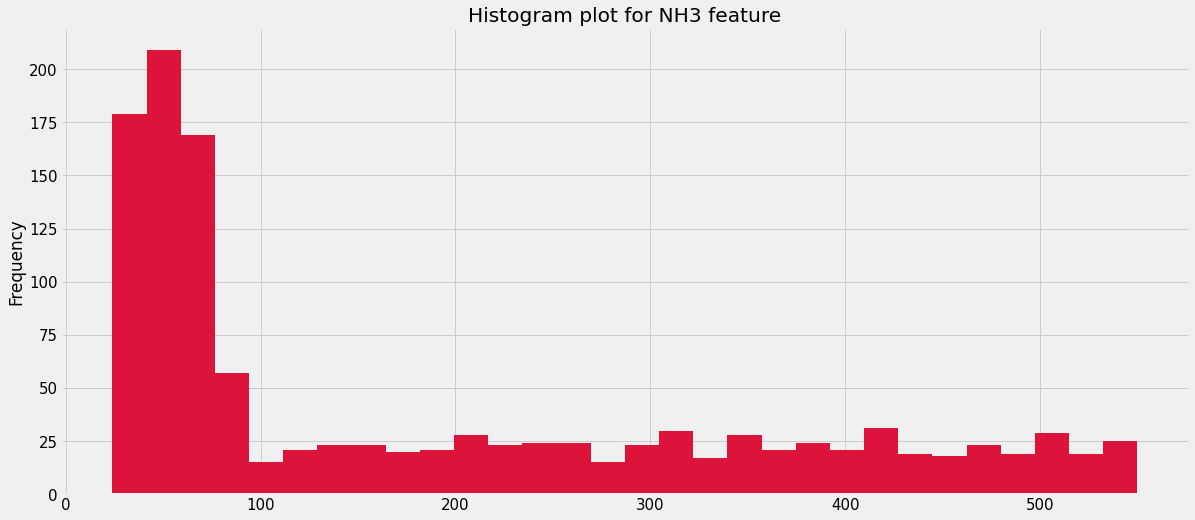

In [14]:
with plt.style.context(style="fivethirtyeight"):
    ax=df["NH3"].plot.hist(bins=30,figsize=(18,8),fontsize=15,title="Histogram plot for NH3 feature",color="crimson")

$$AnalysingC6H6feature$$

In [15]:
min_c6h6=df["C6H6"].min()
max_c6h6=df["C6H6"].max()
print(f"Minimum Number in C6H6 features is -> {min_c6h6}")
print(f"Maximum Number in C6H6 feature is -> {max_c6h6}")

Minimum Number in C6H6 features is -> 50
Maximum Number in C6H6 feature is -> 200


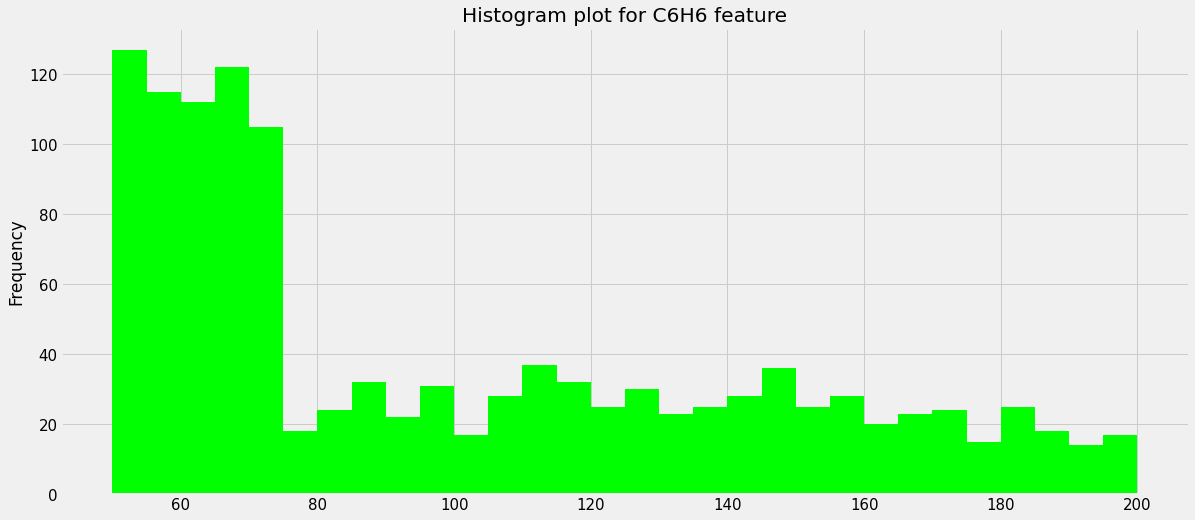

In [16]:
with plt.style.context(style="fivethirtyeight"):
    ax=df["C6H6"].plot.hist(bins=30,figsize=(18,8),fontsize=15,title="Histogram plot for C6H6 feature",color="lime")

### Data Splitting

In [17]:
X=df.drop(labels="Status",axis=1)
y=df[["Status"]]

In [18]:
X.head(10)

,CO,NH3,C6H6
0,1129,455,92
1,179,40,59
2,156,25,66
3,157,36,61
4,936,525,96
5,648,144,82
6,130,80,67
7,1559,196,175
8,186,27,53
9,200,36,72


In [19]:
y.head(10)

,Status
0,1
1,0
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(958, 3) (240, 3) (958, 1) (240, 1)


In [21]:
X_train.to_csv("splitted_data/X_train.csv",index=False)
X_test.to_csv("splitted_data/X_test.csv",index=False)
y_train.to_csv("splitted_data/y_train.csv",index=False)
y_test.to_csv("splitted_data/y_test.csv",index=False)

---